In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns
import warnings
# warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 80
sns.set()

np.random.seed(5)

In [2]:
from synthesizer import Synthesizer
from generator import Generator
from algorithm import Algorithm
from statsmodels.tsa.arima.model import ARIMA

In [3]:
synt = Synthesizer(3)
gen = Generator(synt)
gen.generate(8, 40, 60)

In [4]:
# gen.show_time_series()

In [5]:
algo = Algorithm(gen, total_time=300, period=2)
algo.run()

/Users/sergeykb/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/sergeykb/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sergeykb/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/sergeykb/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameter

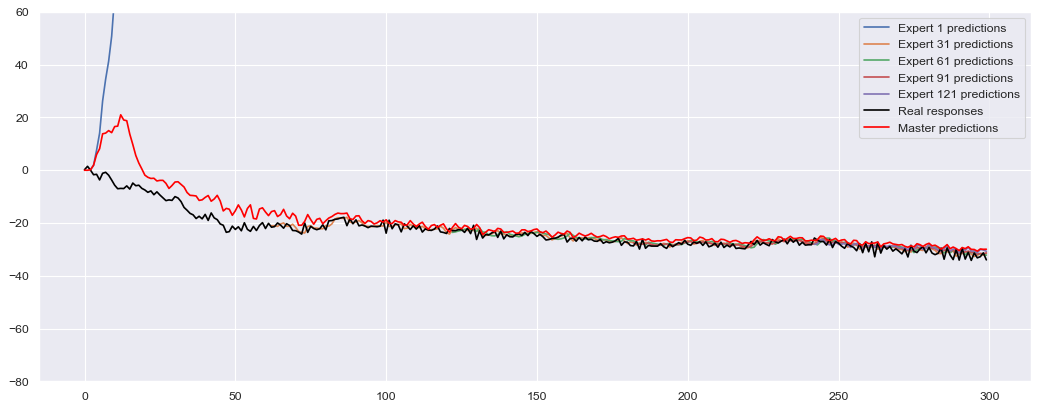

In [8]:
plt.figure(figsize=(16, 6))
for i, p in enumerate(algo.init_points):
    # plt.axvline(p, color='grey', linestyle='--')
    if i % 30 == 0:
        plt.plot(np.arange(gen.curr_time)[algo.init_points[i]:], algo.experts_predictions_all.T[i][algo.init_points[i]:], label=f"Expert {i+1} predictions")
plt.plot(np.arange(gen.curr_time), algo.responses, label="Real responses", color='black')
plt.plot(np.arange(gen.curr_time), algo.master_predictions_all, label="Master predictions", color='red')
plt.ylim(-80, 60)
plt.legend()

In [7]:
for model in algo.models:
    print(f"AR: {model.arparams}  MA: {model.maparams}  All: {model.params}")

AR: [-0.99999986]  MA: [-1.99999895  0.99999942]  All: [ 8.46286267e-01 -9.99999860e-01 -1.99999895e+00  9.99999417e-01
  3.56677966e-09]
AR: [0.1703059]  MA: [ 3.79595317e-05 -9.99810482e-01]  All: [-4.46001428e-02  1.70305898e-01  3.79595317e-05 -9.99810482e-01
  4.30024537e-01]
AR: [0.38538813]  MA: [ 0.50517658 -0.0885954 ]  All: [-1.26748369  0.38538813  0.50517658 -0.0885954   1.72405388]
AR: [0.24514676]  MA: [0.21740911 0.99976825]  All: [-0.52452719  0.24514676  0.21740911  0.99976825  0.89385401]
AR: [-0.86002608]  MA: [1.44653292 0.60159802]  All: [-1.382383   -0.86002608  1.44653292  0.60159802  1.73452301]
AR: [0.57302789]  MA: [0.24498747 0.99929808]  All: [-2.33588727  0.57302789  0.24498747  0.99929808  1.42228023]
AR: [0.71022605]  MA: [0.20322706 0.70346028]  All: [-2.97544557  0.71022605  0.20322706  0.70346028  1.55585031]
AR: [0.73228052]  MA: [0.10061946 0.8443572 ]  All: [-3.3159826   0.73228052  0.10061946  0.8443572   1.41582886]
AR: [0.69980763]  MA: [0.128279